In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import requests

In [2]:
def acquire():
    raw_df = pd.read_csv("flavors_of_cacao.csv") 
    return raw_df

def renaming_col(raw_df):
    old_colnames = raw_df.columns
    new_colnames = ['company','origin','ref','review_date','cocoa_percentage',
                'company_location','rating','bean_type','country']
    raw_df_newcol = raw_df.rename(columns=dict(zip(old_colnames, new_colnames)))
    return raw_df_newcol

def binning_data(raw_df_newcol):
    rating_level=['Unpleasant','Disappointing','Satisfactory','Premium','Elite']
    bins = pd.cut(raw_df_newcol['rating'], 5, labels = rating_level)
    raw_df_newcol['quality_bin'] = bins
    binned_data = raw_df_newcol
    return binned_data

def droping_null(binned_data):
    raw_df_newcol_nonull = raw_df_newcol.dropna()
    return raw_df_newcol_nonull

def api():
    response = requests.get('https://restcountries.eu/rest/v2/all?fields=name;subregion;latlng')
    results = response.json()
    return results

def api_data(results):
    new_data = pd.DataFrame(results)
    new_data = new_data.reindex_axis(['subregion', 'name', 'latlng'], axis=1)
    return new_data

def unifying_api_data(new_data):
    for country_dataframe in raw_df_newcol_nonull['country']:
        for country_api in new_data['name']:
            if country_api == country_dataframe:
                raw_df_newcol_nonull['latitud_longitud'] = new_data['latlng']
                raw_df_newcol_nonull['subregion'] = new_data['subregion']
    return raw_df_newcol_nonull

def change_col_with_api(raw_df_newcol_nonull):
    raw_df_newcol_nonull_api = raw_df_newcol_nonull[['subregion','country', 'latitud_longitud',
                                                   'origin', 'bean_type', 'cocoa_percentage', 'rating', 
                                                   'quality_bin','company', 'company_location']]
    return raw_df_newcol_nonull_api

def mean_subregion(raw_df_newcol_nonull_api):
    regions_mean = raw_df_newcol_nonull_api.groupby('subregion')['rating'].mean()
    regions_mean = regions_mean.sort_values(ascending=False)
    return regions_mean
    

In [3]:
if __name__ == '__main__':
    raw_df = acquire()
    raw_df_newcol = renaming_col(raw_df)
    binned_data = binning_data(raw_df_newcol)
    raw_df_newcol_nonull = droping_null(binned_data)
    results = api()
    new_data = api_data(results)
    raw_df_newcol_nonull = unifying_api_data(new_data)
    raw_df_newcol_nonull_api = change_col_with_api(raw_df_newcol_nonull)
    regions_mean = mean_subregion(raw_df_newcol_nonull_api)
print(regions_mean)
    
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


subregion
Central Asia                 3.800000
Central America              3.593750
Melanesia                    3.550000
South-Eastern Asia           3.500000
Western Asia                 3.500000
Micronesia                   3.464286
Southern Asia                3.416667
Northern Europe              3.312500
Southern Europe              3.308824
Northern America             3.291667
Northern Africa              3.285714
Western Africa               3.264706
                             3.250000
Middle Africa                3.250000
Western Europe               3.222222
Caribbean                    3.214286
Eastern Europe               3.204545
South America                3.183333
Polynesia                    3.150000
Eastern Africa               3.087500
Australia and New Zealand    3.050000
Eastern Asia                 3.031250
Southern Africa              2.916667
Name: rating, dtype: float64


In [4]:
#importing .csv
raw_df = pd.read_csv("flavors_of_cacao.csv")
#printing shape of data frame
print(raw_df.shape)
#displaying data frame
raw_df.head()

(1795, 9)


,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [5]:
#setting column names to a new variable called old_colnames.
old_colnames = raw_df.columns
#renaming column names 
new_colnames = ['company','origin','ref','review_date','cocoa_percentage',
                'company_location','rating','bean_type','country']
raw_df_newcol = raw_df.rename(columns=dict(zip(old_colnames, new_colnames)))
#displaying data frame with new column names
raw_df_newcol.head()

,company,origin,ref,review_date,cocoa_percentage,company_location,rating,bean_type,country
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [6]:
#dropping duplicates
raw_df_newcol = raw_df_newcol.drop_duplicates()

In [7]:
#printing the types of variable
raw_df_newcol.dtypes

company              object
origin               object
ref                   int64
review_date           int64
cocoa_percentage     object
company_location     object
rating              float64
bean_type            object
country              object
dtype: object

In [8]:
#displaying the percentage of valid data
raw_df_newcol.notnull().sum() * 100.0/raw_df_newcol.shape[0]

company             100.00000
origin              100.00000
ref                 100.00000
review_date         100.00000
cocoa_percentage    100.00000
company_location    100.00000
rating              100.00000
bean_type            99.94429
country              99.94429
dtype: float64

In [9]:
#dropping all nulls
raw_df_newcol_nonull = raw_df_newcol.dropna()
#printing new shape of data frame
raw_df_newcol_nonull.shape

(1793, 9)

In [10]:
#changing cocoa_percentage column to float type
raw_df_newcol_nonull['cocoa_percentage'] = raw_df_newcol_nonull['cocoa_percentage'].apply(lambda x: x.split('%')[0])
raw_df_newcol_nonull['cocoa_percentage'] = raw_df_newcol_nonull['cocoa_percentage'].astype('float')
raw_df_newcol_nonull.dtypes

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


company              object
origin               object
ref                   int64
review_date           int64
cocoa_percentage    float64
company_location     object
rating              float64
bean_type            object
country              object
dtype: object

In [11]:
#creating bin for rating level
rating_level=['Unpleasant','Disappointing','Satisfactory','Premium','Elite']
bins = pd.cut(raw_df_newcol_nonull['rating'], 5, labels = rating_level)
raw_df_newcol_nonull['quality_bin'] = bins
raw_df_newcol_nonull.head()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,company,origin,ref,review_date,cocoa_percentage,company_location,rating,bean_type,country,quality_bin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome,Premium
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo,Satisfactory
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo,Satisfactory
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo,Premium
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru,Premium


In [12]:
#counting broad_bean_origin per country
country_count = raw_df_newcol_nonull.country.value_counts()
print(country_count)

Venezuela                       214
Ecuador                         193
Peru                            165
Madagascar                      145
Dominican Republic              141
                                 73
Nicaragua                        60
Brazil                           58
Bolivia                          57
Belize                           49
Papua New Guinea                 42
Colombia                         40
Costa Rica                       38
Vietnam                          38
Tanzania                         34
Ghana                            33
Trinidad                         33
Mexico                           30
Guatemala                        28
Hawaii                           28
Domincan Republic                25
Jamaica                          20
Grenada                          19
Indonesia                        16
Honduras                         15
Cuba                             11
Congo                            10
Sao Tome                    

In [13]:
#deleting lowest bins based on ratings
#bins_to_delete = ['Unpleasant','Disappointing']
#filter_data = raw_df_newcol_nonull[~raw_df_newcol_nonull.quality_bin.isin(bins_to_delete)]
#filter_data.shape

Elite              2
Unpleasant        17
Disappointing    172
Premium          699
Satisfactory     903
Name: quality_bin, dtype: int64


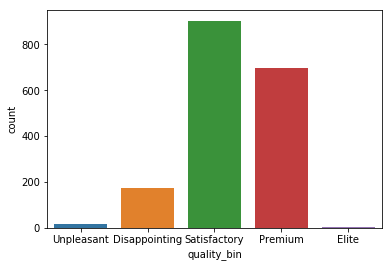

In [14]:
print(raw_df_newcol_nonull['quality_bin'].value_counts().sort_values(ascending=True))
sns.countplot(x ='quality_bin', data=raw_df_newcol_nonull)

In [15]:
response = requests.get('https://restcountries.eu/rest/v2/all?fields=name;subregion;latlng')
results = response.json()
results

[{'name': 'Afghanistan', 'subregion': 'Southern Asia', 'latlng': [33.0, 65.0]},
 {'name': 'Åland Islands',
  'subregion': 'Northern Europe',
  'latlng': [60.116667, 19.9]},
 {'name': 'Albania', 'subregion': 'Southern Europe', 'latlng': [41.0, 20.0]},
 {'name': 'Algeria', 'subregion': 'Northern Africa', 'latlng': [28.0, 3.0]},
 {'name': 'American Samoa',
  'subregion': 'Polynesia',
  'latlng': [-14.33333333, -170.0]},
 {'name': 'Andorra', 'subregion': 'Southern Europe', 'latlng': [42.5, 1.5]},
 {'name': 'Angola', 'subregion': 'Middle Africa', 'latlng': [-12.5, 18.5]},
 {'name': 'Anguilla',
  'subregion': 'Caribbean',
  'latlng': [18.25, -63.16666666]},
 {'name': 'Antarctica', 'subregion': '', 'latlng': [-74.65, 4.48]},
 {'name': 'Antigua and Barbuda',
  'subregion': 'Caribbean',
  'latlng': [17.05, -61.8]},
 {'name': 'Argentina', 'subregion': 'South America', 'latlng': [-34.0, -64.0]},
 {'name': 'Armenia', 'subregion': 'Western Asia', 'latlng': [40.0, 45.0]},
 {'name': 'Aruba', 'subregi

In [16]:
new_data = pd.DataFrame(results)
new_data = new_data.reindex_axis(['subregion', 'name', 'latlng'], axis=1)
new_data.head(10)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


,subregion,name,latlng
0,Southern Asia,Afghanistan,"[33.0, 65.0]"
1,Northern Europe,Åland Islands,"[60.116667, 19.9]"
2,Southern Europe,Albania,"[41.0, 20.0]"
3,Northern Africa,Algeria,"[28.0, 3.0]"
4,Polynesia,American Samoa,"[-14.33333333, -170.0]"
5,Southern Europe,Andorra,"[42.5, 1.5]"
6,Middle Africa,Angola,"[-12.5, 18.5]"
7,Caribbean,Anguilla,"[18.25, -63.16666666]"
8,,Antarctica,"[-74.65, 4.48]"
9,Caribbean,Antigua and Barbuda,"[17.05, -61.8]"


In [17]:
for country_dataframe in raw_df_newcol_nonull['country']:
    for country_api in new_data['name']:
        if country_api == country_dataframe:
            raw_df_newcol_nonull['latitud_longitud'] = new_data['latlng']
            raw_df_newcol_nonull['subregion'] = new_data['subregion']
            

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [18]:
raw_df_newcol_nonull_api = raw_df_newcol_nonull
raw_df_newcol_nonull_api.head()

,company,origin,ref,review_date,cocoa_percentage,company_location,rating,bean_type,country,quality_bin,latitud_longitud,subregion
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome,Premium,"[33.0, 65.0]",Southern Asia
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo,Satisfactory,"[60.116667, 19.9]",Northern Europe
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo,Satisfactory,"[41.0, 20.0]",Southern Europe
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo,Premium,"[28.0, 3.0]",Northern Africa
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru,Premium,"[-14.33333333, -170.0]",Polynesia


In [19]:
raw_df_newcol_nonull_api=raw_df_newcol_nonull_api[['subregion','country', 'latitud_longitud',
                                                   'origin', 'bean_type', 'cocoa_percentage', 'rating', 
                                                   'quality_bin','company', 'company_location']]
raw_df_newcol_nonull_api.head()

,subregion,country,latitud_longitud,origin,bean_type,cocoa_percentage,rating,quality_bin,company,company_location
0,Southern Asia,Sao Tome,"[33.0, 65.0]",Agua Grande,,63.0,3.75,Premium,A. Morin,France
1,Northern Europe,Togo,"[60.116667, 19.9]",Kpime,,70.0,2.75,Satisfactory,A. Morin,France
2,Southern Europe,Togo,"[41.0, 20.0]",Atsane,,70.0,3.00,Satisfactory,A. Morin,France
3,Northern Africa,Togo,"[28.0, 3.0]",Akata,,70.0,3.50,Premium,A. Morin,France
4,Polynesia,Peru,"[-14.33333333, -170.0]",Quilla,,70.0,3.50,Premium,A. Morin,France


In [20]:
regions_mean = raw_df_newcol_nonull_api.groupby('subregion')['rating'].mean()
regions_mean.sort_values(ascending=False)

subregion
Central Asia                 3.800000
Central America              3.593750
Melanesia                    3.550000
South-Eastern Asia           3.500000
Western Asia                 3.500000
Micronesia                   3.464286
Southern Asia                3.416667
Northern Europe              3.312500
Southern Europe              3.308824
Northern America             3.291667
Northern Africa              3.285714
Western Africa               3.264706
                             3.250000
Middle Africa                3.250000
Western Europe               3.222222
Caribbean                    3.214286
Eastern Europe               3.204545
South America                3.183333
Polynesia                    3.150000
Eastern Africa               3.087500
Australia and New Zealand    3.050000
Eastern Asia                 3.031250
Southern Africa              2.916667
Name: rating, dtype: float64

In [21]:
origin_mean = raw_df_newcol_nonull_api.groupby('origin')['rating'].mean()
origin_mean.sort_values(ascending=False)

origin
Toscano Black                                    4.166667
Ocumare 67, Puertofino                           4.000000
Piura, Choc. Garage Exclusive                    4.000000
Guanaja                                          4.000000
Sambirano Valley, #216, MR, LC                   4.000000
Guayas                                           4.000000
Roxborough, Tobago                               4.000000
Rio Peripa H.                                    4.000000
Rio Dulce, Xoco                                  4.000000
Cabosse                                          4.000000
Kaori                                            4.000000
Porcelana, Zulia                                 4.000000
Bellavista Coop, #225, LR, MC, CG Exclusive      4.000000
Porcelana, Tabasco, Limited Ed.                  4.000000
Porcelana, Tabasco, La Joya                      4.000000
Porcelana, Sorotaima,Machiques,batch pcl001      4.000000
Bali, Sukrama Bros. Farm, Melaya, 62hr C         4.000000
Porcela